In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import warnings
warnings.filterwarnings('ignore')


In [22]:
class NaiveBayesClassifier:
    def __init__(self):
        self._prior_probabilities = dict()
        self._means = dict()
        self._std_deviations = dict()
        self._classes = []
        self._scores = dict()
    
    def fit(self, X, y):
        self._classes = np.unique(y)
        
        for data_class in self._classes:
            X_class = X[y==data_class]
            self._prior_probabilities[data_class] = len(y[y==data_class])/len(y)
            self._means[data_class] = np.mean(X_class, axis=0)
            self._std_deviations[data_class] = np.std(X_class, axis=0)

    def predict(self, X):
        predictions = []
        for x in X:
            scores = []
            for data_class in self._classes:
                score = (np.sum(np.log(scipy.stats.norm.pdf(x, self._means[data_class], self._std_deviations[data_class])))
                         + np.log(self._prior_probabilities[data_class]))
                scores.append(score)
            predictions.append(self._classes[np.argmax(scores)])
        return predictions


In [23]:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

model = NaiveBayesClassifier()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
print(f'Train accuracy: {accuracy_score(y_train, train_predictions)}')

validation_predictions = model.predict(X_validation)
print(f'Validation accuracy: {accuracy_score(y_validation, validation_predictions)}')

Train accuracy: 0.9313186813186813
Validation accuracy: 0.945054945054945


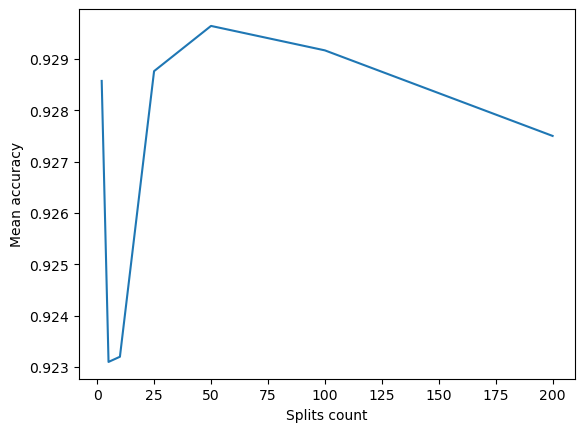

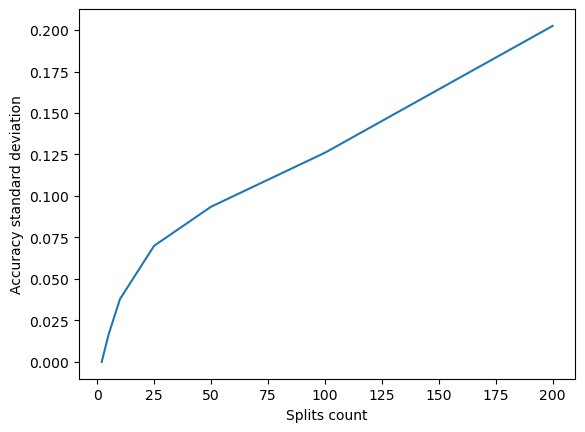

In [24]:
k_list = [2, 5, 10, 25, 50, 100, 200]
mean_accuracies = []
std_accuracies = []
for k in k_list:
    kf = KFold(n_splits=k, random_state=1, shuffle=True)
    accuracies = []

    for train_index, validation_index in kf.split(X_train):
        X_train_kf, X_validation_kf = X_train[train_index], X_train[validation_index]
        y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
        
        model.fit(X_train_kf, y_train_kf)
        validation_predictions_kf = model.predict(X_validation_kf)
        accuracies.append(accuracy_score(y_validation_kf, validation_predictions_kf))

    mean_accuracies.append(np.mean(accuracies))
    std_accuracies.append(np.std(accuracies))

plt.xlabel('Splits count')
plt.ylabel('Mean accuracy')
plt.plot(k_list, mean_accuracies)
plt.show()
plt.xlabel('Splits count')
plt.ylabel('Accuracy standard deviation')
plt.plot(k_list, std_accuracies)
plt.show()


In [25]:
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9473684210526315
